# SABR Model Test Code

In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [2]:
### only run this when you changed the class definition
CODE_CHANGED = True
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'beta': 1,
 'texp': 1,
 'sigma': 0.2,
 'alpha': 0.3,
 'rho': 0.25,
 'intr': 0,
 'divr': 0,
 'bsm_model': <option_models.bsm.Model at 0x25d84f8d438>}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

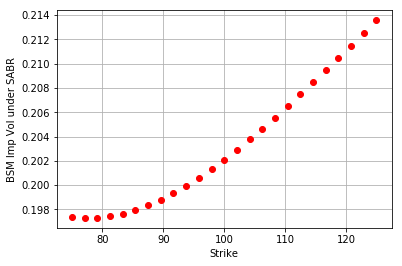

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [7]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)#上面是0.19995804，还是比较接近的

0.19999999999936008

### (2) SABR for $\beta=0$

In [8]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20.0
texp = 1.0
alpha = 0.5
rho = -0.25
beta = 0

In [9]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

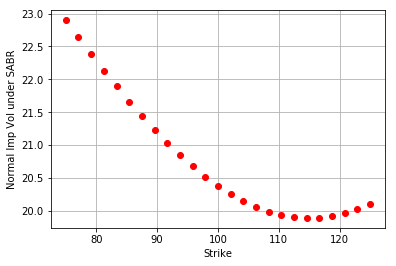

In [10]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [11]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'beta': 0.0,
 'texp': 1.0,
 'sigma': 20.0,
 'alpha': 0.5,
 'rho': -0.25,
 'intr': 0,
 'divr': 0,
 'normal_model': <option_models.normal.Model at 0x25df2d2d470>}

In [12]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [13]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)#老师希望是impvol返求的与normvol求的应该是一样的才对，但是会有一定差别

19.999999999999922

### (3) Smile calibration to 3 options（作业从这里开始）

In [14]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([14.37778096,  8.12948788,  3.9368394 ]),
 array([21.18982474, 20.37760417, 19.94575372]))

In [15]:
### only run this when you changed the class definition
CODE_CHANGED = False
if( CODE_CHANGED ):
    imp.reload(opt)

In [16]:
###这里是第一个calibration

In [17]:
# makre sure this return the original sigma, alpha, rho 
#I think this rely on your primitive value for initial solutions
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

vol: [21.18982474 20.37760417 19.94575372]


(19.999999999974257, 0.4999999998914349, -0.25000000007807877)

In [18]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

price to vol [21.189824740647285, 20.377604166666664, 19.945753715754922]


(19.999999999974257, 0.4999999998914349, -0.25000000007807877)

Below is same for sabr_bsm

In [19]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([13.55352055,  8.0492952 ,  4.52747026]),
 array([0.19891353, 0.20210938, 0.20631472]))

In [20]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

vol: [0.19891353 0.20210938 0.20631472]


(0.20000000000300716, 0.2999999993022627, 0.2500000005498378)

In [21]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, is_vol=False)

price to vol [0.19891352767275702, 0.2021093750000002, 0.2063147242919982]


(0.20000000000316703, 0.29999999928529303, 0.2500000005589751)

## 2. Pricing under MC method

In [22]:
strike = np.linspace(75,125,num=25)
forward = 100


In [23]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x0000025D84F8D438>}


In [24]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc


(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.20115   , 23.32644467, 21.51194533, 19.75617472, 18.07742196,
        16.4813539 , 14.97530767, 13.54449619, 12.20369447, 10.9661511 ,
         9.83153738,  8.80249929,  7.84433984,  6.9609907 ,  6.16827458,
         5.44926244,  4.82224995,  4.26703774,  3.76029197,  3.30221871,
         2.89754883,  2.53494694,  2.20695568,  1.91665769,  1.65813619]))

Repeat the same for beta = 0

In [25]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1.0, 'sigma': 20.0, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x0000025DF2D2D470>}


In [26]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.50528364, 24.67732813, 22.88170992, 21.12393848, 19.41478231,
        17.76337987, 16.17695063, 14.66512686, 13.2120754 , 11.83322207,
        10.52297605,  9.2998774 ,  8.15756145,  7.10553129,  6.19060161,
         5.35443343,  4.59244489,  3.90844435,  3.29616209,  2.75726356,
         2.30173876,  1.93117343,  1.61303271,  1.3475877 ,  1.11810321]))

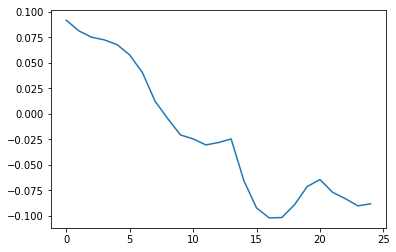

In [27]:
plt.plot(price_hagan-price_mc)

## 3. Pricing under conditional MC method

In [28]:
strike = np.linspace(75,125,num=25)
forward = 100

In [29]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x0000025D84F8D438>}


In [30]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.82273586, 23.94548283, 22.12330726, 20.36429825, 18.67609963,
        17.06558253, 15.53856424, 14.09959502, 12.75182557, 11.49695822,
        10.33527658,  9.26574166,  8.28613884,  7.39325817,  6.58309162,
         5.85103248,  5.19206564,  4.60094033,  4.07232023,  3.60090863,
         3.1815482 ,  2.80929688,  2.47948207,  2.18773612,  1.93001615]))

Repeat the same for beta = 0

In [31]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1.0, 'sigma': 20.0, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x0000025DF2D2D470>}


In [32]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.4413808 , 24.61583546, 22.82785145, 21.08217248, 19.38388392,
        17.73835659, 16.15116272, 14.62796114, 13.1743504 , 11.79569183,
        10.4969079 ,  9.28226603,  8.15516244,  7.11792372,  6.17164619,
         5.3160915 ,  4.54965311,  3.86940129,  3.2712053 ,  2.74992221,
         2.29963448,  1.9139132 ,  1.58608302,  1.30946748,  1.07759817]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [37]:
#All function contains a seed of 12345
#Initial all instances
#for Normal
strike = np.linspace(75,125,num=5)

forward = 100
sigma = 20.0
texp = 1.0
alpha = 0.5
rho = -0.25
beta = 0

ModelNormalMC=opt.sabr.ModelNormalMC(texp, sigma, alpha=alpha, rho=rho)
ModelNormalCMC=opt.sabr.ModelNormalCondMC(texp, sigma, alpha=alpha, rho=rho)

MC=[ModelNormalMC.price(strike,forward,seed_=False) for i in range(100)]
CMC=[ModelNormalCMC.price(strike,forward,seed_=False) for i in range(100)]
print("Brute Force MC:",'mean',np.mean(MC,axis=0),"std",np.std(MC,axis=0))
print("Conditional MC:",'mean',np.mean(CMC,axis=0),"std",np.std(CMC,axis=0))



Brute Force MC: mean [26.48341958 16.11600958  8.07293803  3.17937146  1.01156482] std [0.63832133 0.54292698 0.39880043 0.24667209 0.15080094]
Conditional MC: mean [26.56500532 16.19534134  8.12897859  3.21814495  1.03573211] std [0.09872768 0.06266896 0.0389836  0.03524962 0.02446954]


In [34]:
# For BSM
strike = np.linspace(75,125,num=3)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1
ModelBsmMC=opt.sabr.ModelBsmMC(texp, sigma, alpha=alpha, rho=rho)
ModelBsmCMC=opt.sabr.ModelBsmCondMC(texp, sigma, alpha=alpha, rho=rho)

MC=[ModelBsmMC.price(strike,forward,seed_=False) for i in range(100)]
CMC=[ModelBsmCMC.price(strike,forward,seed_=False) for i in range(100)]
print("Brute Force MC:",'mean',np.mean(MC,axis=0),"std",np.std(MC,axis=0))
print("Conditional MC:",'mean',np.mean(CMC,axis=0),"std",np.std(CMC,axis=0))


Brute Force MC: mean [25.46960949  7.97193702  1.77497462] std [0.62638131 0.43902596 0.22586063]
Conditional MC: mean [25.56826684  8.06180663  1.81570588] std [0.15718069 0.12538879 0.05875054]


##Conditional MC has a smaller standard deviation than brute force MC